In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [4]:
# Create 2000-2019 dataframe
spotify_df = pd.read_csv("Resources/spotify_from_2000-2019.csv")

# Display sample data
spotify_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values,x_loc,y_loc,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


# A study of valence

The r-squared is: 0.0006287970406125265


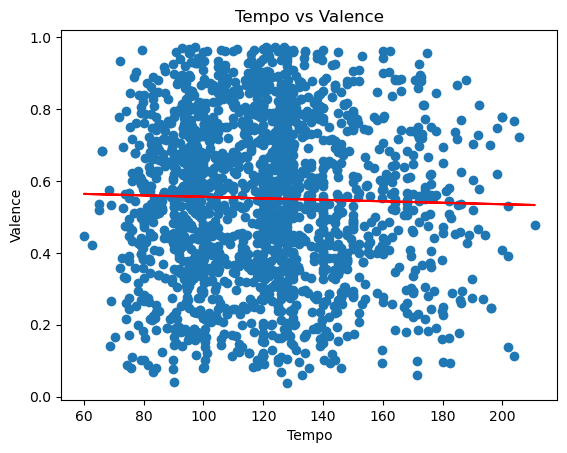

In [8]:
#Linear regression plot of tempo vs valence
linear_reg_plot(spotify_df['tempo'],spotify_df['valence'],0,0,"Tempo","Valence", "Tempo vs Valence")


The r-squared is: 0.0002605660266753847


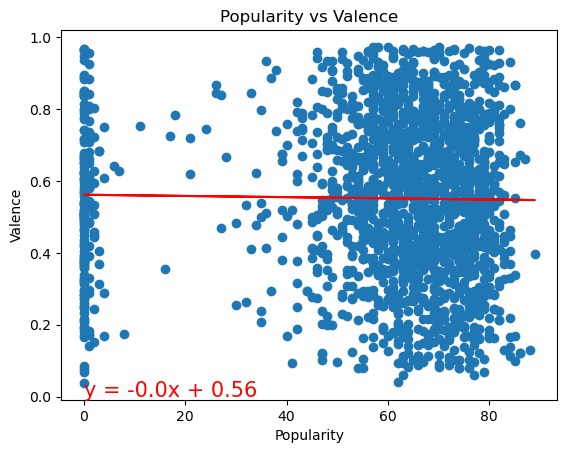

In [10]:
#Linear regression plot of popularity vs valence
linear_reg_plot(spotify_df['popularity'],spotify_df['valence'],0,0,"Popularity","Valence", "Popularity vs Valence")

The r-squared is: 0.11187314507553135


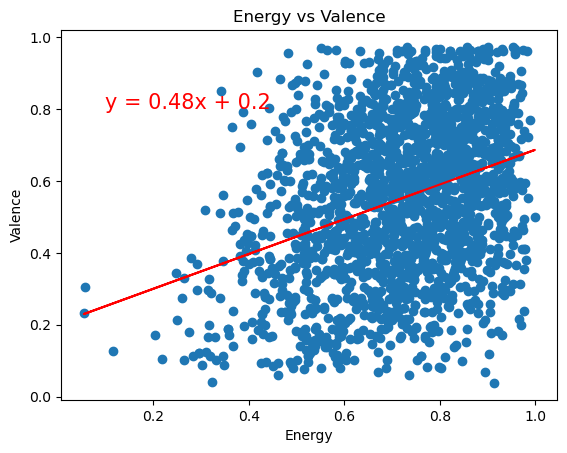

In [25]:
#Linear regression plot of energy vs valence
linear_reg_plot(spotify_df['energy'],spotify_df['valence'],0.1,0.8,"Energy","Valence", "Energy vs Valence")

The r-squared is: 0.005577236925539582


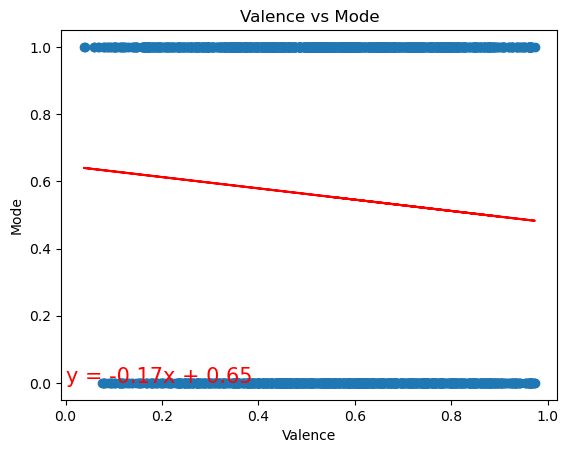

In [12]:
#Linear regression plot of valence vs mode (major or minor)
linear_reg_plot(spotify_df['valence'],spotify_df['mode'],0,0,"Valence","Mode", "Valence vs Mode")

# Speechiness

The r-squared is: 0.005417696481255685


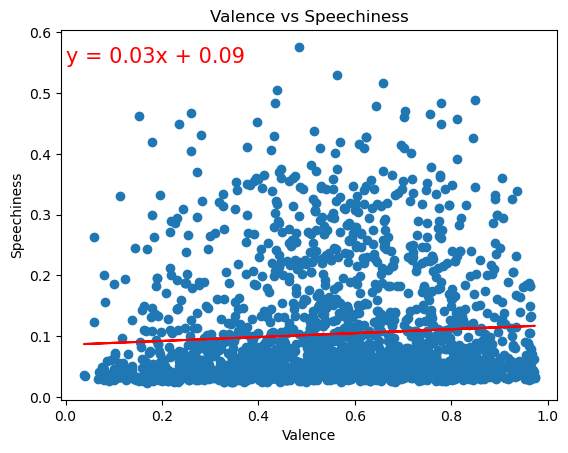

In [15]:
#Linear regression plot of valence vs mode (major or minor)
linear_reg_plot(spotify_df['valence'],spotify_df['speechiness'],0,.55,"Valence","Speechiness", "Valence vs Speechiness")

The r-squared is: 0.00044784516664119254


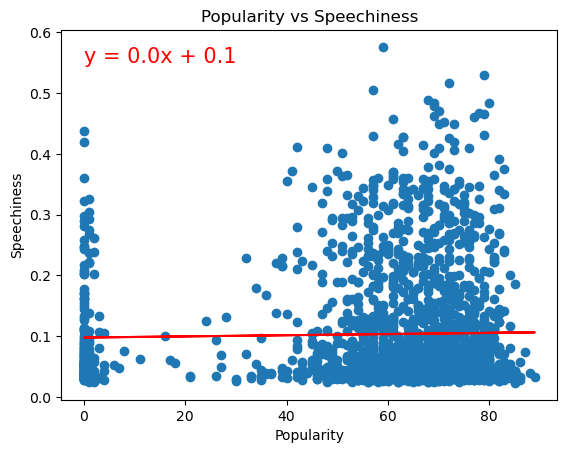

In [18]:
#Linear regression plot of popularity vs speechiness
linear_reg_plot(spotify_df['popularity'],spotify_df['speechiness'],0,.55,"Popularity","Speechiness", "Popularity vs Speechiness")

The r-squared is: 0.003334770396161147


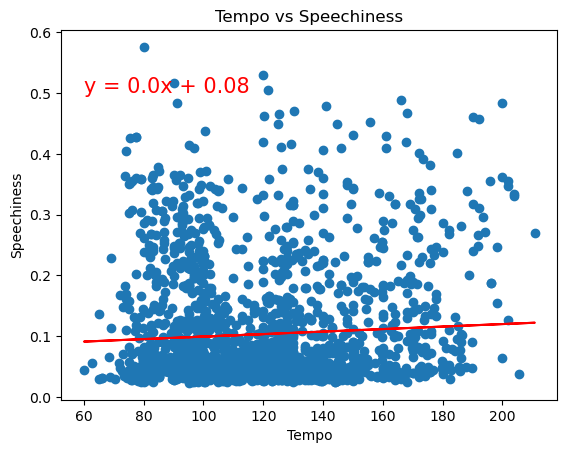

In [23]:
#Linear regression plot of Tempo vs Speechiness
linear_reg_plot(spotify_df['tempo'],spotify_df['speechiness'],60,0.5,"Tempo","Speechiness", "Tempo vs Speechiness")

The r-squared is: 1.2572203117894572e-05


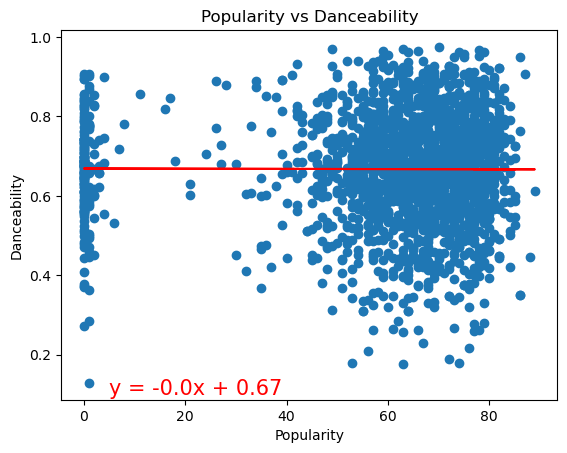

In [28]:
#Linear regression plot of popularity vs danceability
linear_reg_plot(spotify_df['popularity'],spotify_df['danceability'],5,0.1,"Popularity","Danceability", "Popularity vs Danceability")

The r-squared is: 0.0006061034264573867


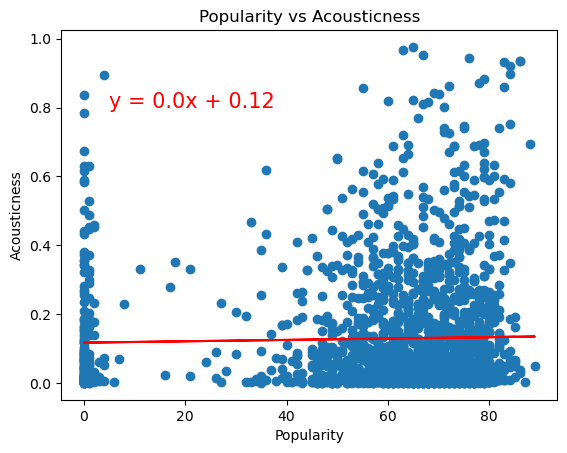

In [30]:
#Linear regression plot of popularity vs acousticness
linear_reg_plot(spotify_df['popularity'],spotify_df['acousticness'],5,0.8,"Popularity","Acousticness", "Popularity vs Acousticness")

In [44]:
#Finding 0 popularity
losers = pd.DataFrame(spotify_df.loc[(spotify_df["popularity"]< 10) & (spotify_df["popularity"] >= 0), :])
losers.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.0328,0.048200,0.3600,0.808,139.066,pop
59,Oasis,Go Let It Out,278666,False,2000,0,0.408,0.849,2,-5.631,1,0.0333,0.0136,0.000025,0.5600,0.628,84.192,"Folk/Acoustic, rock"
62,Mariah Carey,Against All Odds (Take A Look at Me Now) (feat...,199480,False,2011,0,0.471,0.514,1,-5.599,1,0.0315,0.5840,0.000000,0.1030,0.373,117.338,"pop, R&B"
105,Nelly Furtado,I'm Like A Bird,243160,False,2000,1,0.622,0.608,10,-5.085,1,0.0360,0.1380,0.000005,0.2730,0.607,89.661,"hip hop, pop, latin"
126,Jennifer Lopez,Ain't It Funny,246160,False,2001,0,0.707,0.869,5,-4.525,0,0.0481,0.1040,0.000121,0.0813,0.621,99.825,"hip hop, pop, R&B"
